# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [18]:
# Group by Drug Regimen
drug_data = mouse_data.groupby('Drug Regimen')

#Mean Tumor Volume
mean_tumor_vol = drug_data['Tumor Volume (mm3)'].mean()
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)
mean_tumor_vol = mean_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

#Median Tumor Volume
median_tumor_vol = drug_data['Tumor Volume (mm3)'].median()
median_tumor_vol= pd.DataFrame(median_tumor_vol)
median_tumor_vol = median_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})

#Tumor Volume Variance
var_tumor_vol = drug_data['Tumor Volume (mm3)'].var()
var_tumor_vol = pd.DataFrame(var_tumor_vol)
var_tumor_vol = var_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})

#Tumor Volume Standard Deviation
std_dev_tumor_vol = drug_data['Tumor Volume (mm3)'].std()
std_dev_tumor_vol = pd.DataFrame(std_dev_tumor_vol)
std_dev_tumor_vol = std_dev_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})

#SEM Tumor Volume
sem_tumor_vol = drug_data['Tumor Volume (mm3)'].sem()
sem_tumor_vol = pd.DataFrame(sem_tumor_vol)
sem_tumor_vol = sem_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})

#Merging
summary_stats = pd.merge(mean_tumor_vol, median_tumor_vol, left_index= True, right_index= True)
summary_stats = pd.merge(summary_stats, var_tumor_vol, left_index= True, right_index= True)
summary_stats = pd.merge(summary_stats, std_dev_tumor_vol, left_index= True, right_index= True)
summary_stats = pd.merge(summary_stats, sem_tumor_vol, left_index= True, right_index= True)

#Show Data
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
organized_summary_stats = summary_stats.rename(columns={'Mean Tumor Volume':'mean',
                                                       'Median Tumor Volume': 'median',
                                                       'Tumor Volume Variance': 'var',
                                                       'Tumor Volume Std. Dev.':'std',
                                                       'Tumor Volume Std. Err.':'sem'})
organized_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

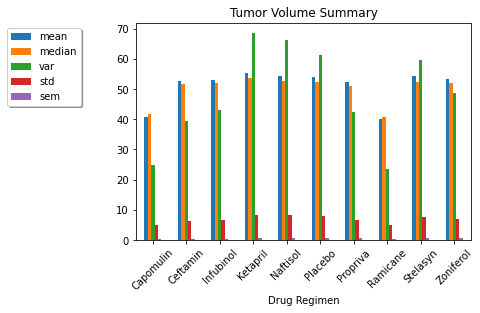

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_bar_chart = organized_summary_stats.plot(kind='bar',title= 'Tumor Volume Summary')
# Set the xlabel
summary_bar_chart.set_xlabel("Drug Regimen")

#legend
summary_bar_chart.legend(loc='upper left', bbox_to_anchor=(-0.4,1), shadow=True, ncol=1)

# Set tick labels
summary_bar_chart.set_xticklabels(organized_summary_stats.index, rotation=45)

plt.show()
plt.tight_layout()

(0.0, 255.0)

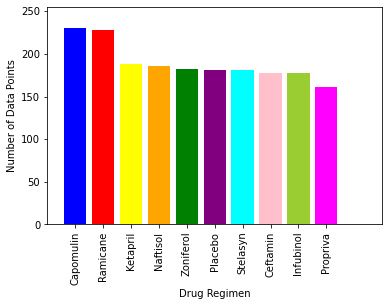

In [21]:
# Get Number of Data Points for each Regimen
organized_drug_regimen = mouse_data.groupby('Drug Regimen')
organized_drug_regimen = organized_drug_regimen['Timepoint'].count()
organized_drug_regimen = pd.DataFrame(organized_drug_regimen)
organized_drug_regimen = organized_drug_regimen.sort_values('Timepoint',ascending=False)
drug_count = organized_drug_regimen['Timepoint']

#Get labels by using Drug Regimen
drug_regimen = organized_drug_regimen.index

# set x-axis
x_axis = np.arange(len(drug_count))

#set colors
colors = 'blue','red','yellow','orange','green','purple','cyan','pink','yellowgreen', 'magenta'

# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis, drug_count , align="center", color=colors)

#Set ticks
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, drug_regimen)
plt.xticks(rotation=90)


# Set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#Set x and y limits
plt.xlim(-1, len(x_axis)+1)
plt.ylim(0, max(drug_count)+25)

Text(0.5, 1.0, 'Sex')

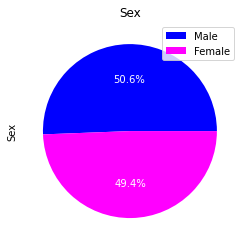

In [22]:
#Get male versus female count
sex_count = mouse_data['Sex'].value_counts()
sex_count_df = pd.DataFrame(sex_count)

#set colors
sex_color = 'blue','magenta'

#Generate a pie plot showing the distribution of female versus male mice using panda
sex_count_df.plot(kind='pie', y='Sex' , colors=sex_color,
        autopct="%1.1f%%",textprops={'color':"w"} )
plt.title("Sex")

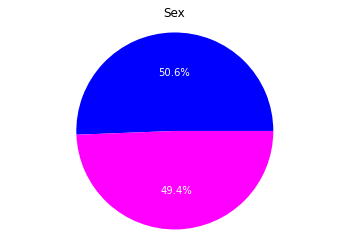

In [23]:
#pie chart using pyplot
plt.title("Sex")
plt.pie(sex_count, colors=sex_color,
        autopct="%1.1f%%",textprops={'color':"w"})
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse
top_timepoint = mouse_data.groupby('Mouse ID').max()
top_timepoint = top_timepoint.reset_index()
top_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [45]:
# Quantitatively determine capomulin outliers
capomulin_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Capomulin', :]
capomulin = capomulin_data['Tumor Volume (mm3)']
capomulin_avg = capomulin_data['Tumor Volume (mm3)'].mean()
capomulin_std = round(capomulin_data.std(),2)

capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_iqr}")
print(f"The the median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")


The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.74900552
The interquartile range of Capomulin is: 1.7490055199999972
The the median of Capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


In [46]:
# Quantitatively determine ramicane outliers
ramicane_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Ramicane', :]
ramicane = ramicane_data['Tumor Volume (mm3)']
ramicane_avg = ramicane_data['Tumor Volume (mm3)'].mean()
ramicane_std = round(ramicane_data.std(),2)

ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"The lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {ramicane_iqr}")
print(f"The the median of Ramicane is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")


The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34383237
The interquartile range of Ramicane is: 1.3438323700000012
The the median of Ramicane is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


In [9]:
# Quantitatively determine ramicane outliers

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [47]:
# Quantitatively determine infubinol outliers
infubinol_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Infubinol', :]
infubinol = infubinol_data['Tumor Volume (mm3)']
infubinol_avg = infubinol_data['Tumor Volume (mm3)'].mean()
infubinol_std = round(infubinol_data.std(),2)

infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {infubinol_iqr}")
print(f"The the median of Infubinol is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [10]:
# Quantitatively determine infubinol outliers

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [48]:
# Quantitatively determine ceftamin outliers
ceftamin_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Ceftamin', :]
ceftamin = ceftamin_data['Tumor Volume (mm3)']
ceftamin_avg = ceftamin_data['Tumor Volume (mm3)'].mean()
ceftamin_std = round(ceftamin_data.std(),2)

ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {ceftamin_iqr}")
print(f"The the median of Ceftamin is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [11]:
# Quantitatively determine ceftamin outliers

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


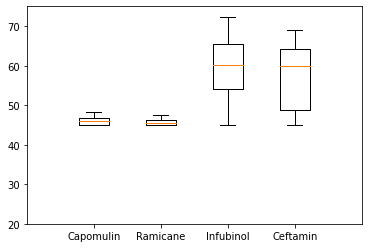

In [53]:
a1= [capomulin, ramicane, infubinol, ceftamin]

means = [capomulin_avg, ramicane_avg, infubinol_avg, ceftamin_avg]
standard_errors = [capomulin_std, ramicane_std, infubinol_std, ceftamin_std]

top_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
box_x_axis = np.arange(len(a1))            
                       
fig1, ax1 = plt.subplots()
ax1.boxplot(a1)

plt.xticks([1, 2, 3,4], top_drug_regimens)

plt.xlim(0, 5)
plt.ylim(20, 75)

plt.show()

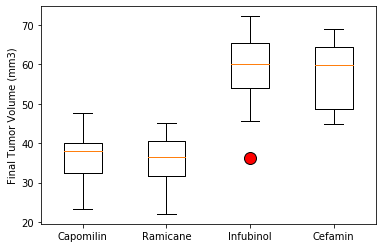

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

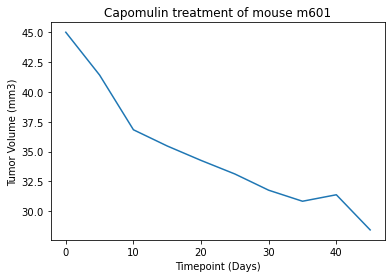

In [30]:
capomulin_mouse = mouse_data.loc[mouse_data["Drug Regimen"]=='Capomulin', :]
capomulin_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"]=='m601',:]

#labels
plt.title('Capomulin treatment of mouse m601')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.show()

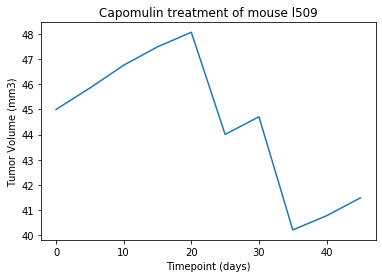

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Text(0, 0.5, 'Average Tumor Volume (mm3)')

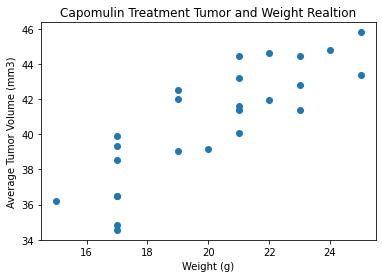

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = mouse_data.loc[mouse_data["Drug Regimen"]=='Capomulin', :]
capomulin_regimen = capomulin_regimen.groupby('Mouse ID')
capomulin_avg = capomulin_regimen['Tumor Volume (mm3)'].mean()
capomulin_avg = pd.DataFrame(capomulin_avg)
capomulin_avg = capomulin_avg.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
capomulin_weight = capomulin_regimen.max()

#plot
x_values = capomulin_weight['Weight (g)']
y_values = capomulin_avg['Average Tumor Volume (mm3)']
plt.scatter(x_values,y_values)

#labels
plt.title("Capomulin Treatment Tumor and Weight Realtion")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

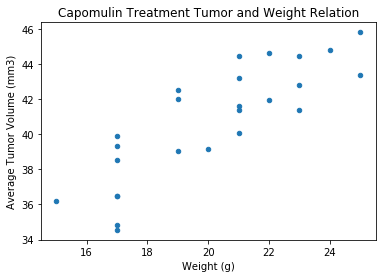

## Correlation and Regression

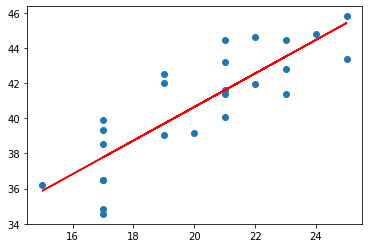

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")